In [1]:
%load_ext autoreload

In [2]:
import numpy as np
import seaborn as sns
from fqt import FastQuantileTransformer
from sklearn.preprocessing import QuantileTransformer

sns.set(style='darkgrid')

Let's generated some random integer data in a small range to explore the problem of same values:

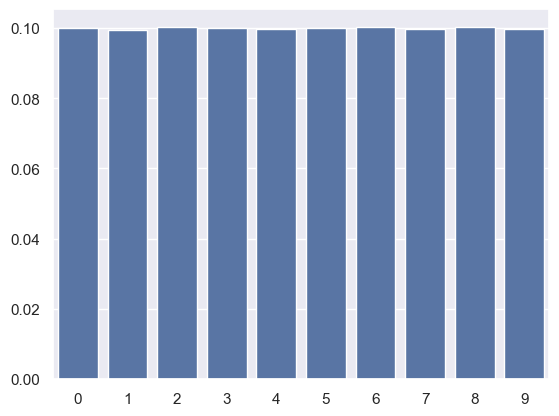

In [3]:
n_samples = 1000000
max_value = 10
X = np.random.randint(0, max_value, size=(n_samples))
X_sorted = np.sort(X)
        
sns.barplot([(X == i).mean() for i in range(max_value)])

y = np.random.random() * 10

Firstly, we use classic QuantileTransformer from sklearn to explore the problem

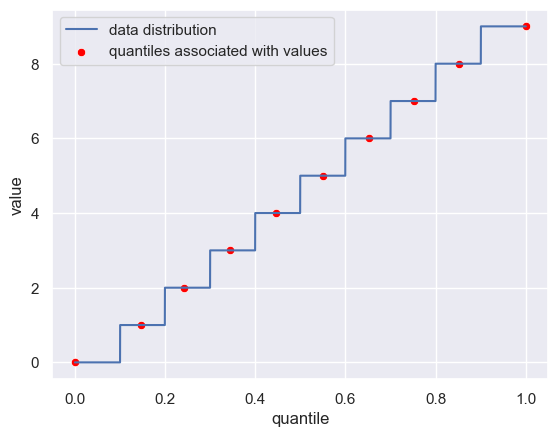

In [4]:
X_transformed = QuantileTransformer().fit_transform(X[:, np.newaxis]).reshape(-1)
sns.lineplot(y = X_sorted, x = [i / X.shape[0] for i in range(X.shape[0])], label='data distribution').set_ylabel('value')
_ = sns.scatterplot(x = np.unique(X_transformed), y = range(max_value), color='red', label='quantiles associated with values').set_xlabel('quantile')

Border values (0 and 9) quantiles are not in middle of the segment which represent this value. It makes data non consistent and can affect your models.

To solve this you can use `noise_distribution` parametr in FastQuantileTransformer which describes the policy of noise which will be added to your data:
* `uniform` samples noise from $\mathbb{U}[-\text{epsilon}, \text{epsilon}]$
* `normal` samples noise from $\mathbb{N}(0, \text{epsilon})$
* `deterministic` use  $noise_{ij} = \frac{i}{N} \cdot \text{epsilon}$, where N is number of samples.

`epsilon` is a hyperparameter for the all distributions, you can configure it in attributes. Be default `epsilon = 1e-5`

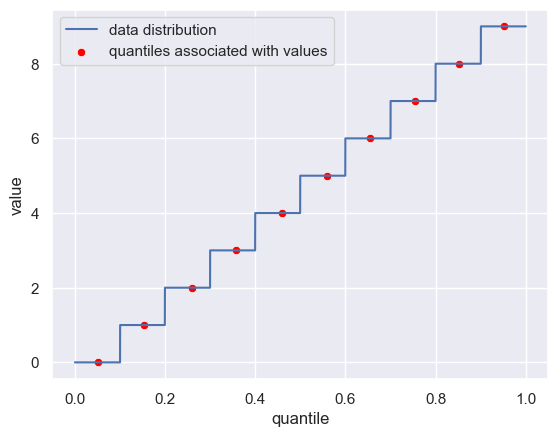

In [5]:
X_transformed_noise = FastQuantileTransformer(noise_distribution='uniform').fit_transform(X[:, np.newaxis]).reshape(-1)
sns.lineplot(y = X_sorted, x = [i / X.shape[0] for i in range(X.shape[0])], label='data distribution').set_ylabel('value')
_ = sns.scatterplot(x = np.unique(X_transformed_noise), y = range(max_value), color='red', label='quantiles associated with values').set_xlabel('quantile')

However, using random noise is not the best solution in all situations. Let's use a smaller dataset to explore the problem:

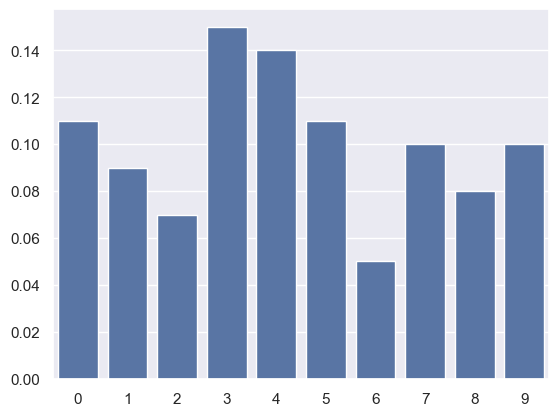

In [6]:
n_samples = 100
max_value = 10
np.random.seed(0)
X = np.random.randint(0, max_value, size=(n_samples))
X_sorted = np.sort(X)
        
sns.barplot([(X == i).mean() for i in range(max_value)])

y = np.random.random() * 10

/Users/vaaven/fqt/fqt/transformer.py:214: UserWarning: n_quantiles (1000) is greater than the total number of samples (100). n_quantiles is set to n_samples.
  warnings.warn(
/opt/homebrew/lib/python3.12/site-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (100). n_quantiles is set to n_samples.
  warnings.warn(


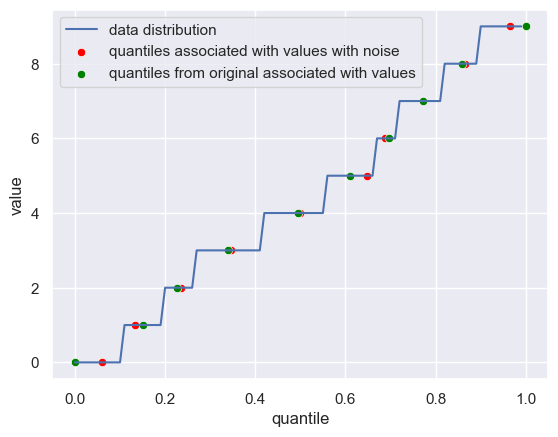

In [7]:
X_transformed_noise = FastQuantileTransformer(noise_distribution='uniform').fit_transform(X[:, np.newaxis]).reshape(-1)
X_transformed_sklearn = QuantileTransformer().fit_transform(X[:, np.newaxis]).reshape(-1)
sns.lineplot(y = X_sorted, x = [i / X.shape[0] for i in range(X.shape[0])], label='data distribution').set_ylabel('value')
_ = sns.scatterplot(x = np.unique(X_transformed_noise), y = range(max_value), color='red', label='quantiles associated with values with noise').set_xlabel('quantile')
_ =  sns.scatterplot(x = np.unique(X_transformed_sklearn), y = range(max_value), color='green', label='quantiles from original associated with values')

Noticeably, quantiles from data with noise can differ a lot from center of segment. To solve this you can use `deterministic` noise:

/Users/vaaven/fqt/fqt/transformer.py:214: UserWarning: n_quantiles (1000) is greater than the total number of samples (100). n_quantiles is set to n_samples.
  warnings.warn(
/opt/homebrew/lib/python3.12/site-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (100). n_quantiles is set to n_samples.
  warnings.warn(


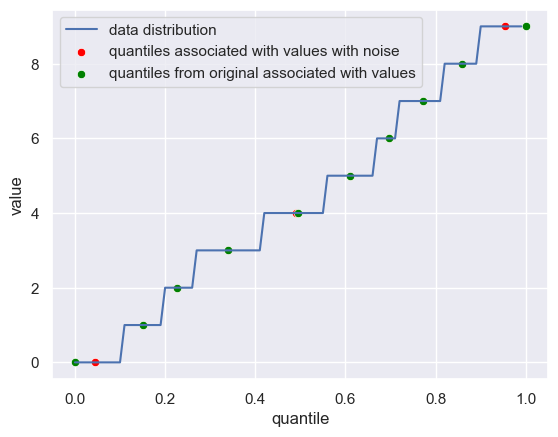

In [8]:
X_transformed_noise = FastQuantileTransformer(noise_distribution='deterministic').fit_transform(X[:, np.newaxis]).reshape(-1)
X_transformed_sklearn = QuantileTransformer().fit_transform(X[:, np.newaxis]).reshape(-1)
sns.lineplot(y = X_sorted, x = [i / X.shape[0] for i in range(X.shape[0])], label='data distribution').set_ylabel('value')
_ = sns.scatterplot(x = np.unique(X_transformed_noise), y = range(max_value), color='red', label='quantiles associated with values with noise').set_xlabel('quantile')
_ =  sns.scatterplot(x = np.unique(X_transformed_sklearn), y = range(max_value), color='green', label='quantiles from original associated with values')